# SWMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.92/fig 3-2. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [1]:
import numpy as np
from math import fabs
from sklearn.datasets import fetch_openml
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

def MNIST_GetDataSet():
    return fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
def MyAccuracy(y_true, y_pred):
    if len(y_true) == 0:
        return 0
    res = 0
    it = 0
    for fact in y_true:
        if fact == y_pred[it]:
            res += 1
        it += 1
    return res/len(y_pred)

    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    eps=1E-9
    assert fabs(a0-a1)<eps, "MyAcc seems to be wrong" 
    
X,y = MNIST_GetDataSet()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5')    
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
pred = sgd_clf.predict(X_test)
    
TestAccuracy(y_test_5, pred)

dummy_clf = DummyClassifier()

dummy_clf.fit(X_train,y_train_5)
predDummy = dummy_clf.predict(X_test)

TestAccuracy(y_test_5, predDummy)


my a          =0.9492
scikit-learn a=0.9492

my a          =0.9108
scikit-learn a=0.9108


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [2]:
import numpy as np
from math import fabs
from sklearn.datasets import fetch_openml
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def MyPrecision(y_true, y_pred):
    if len(y_true) == 0:
        return 0
    TP = 0
    FP = 0
    it = 0
    for fact in y_true:
        if fact == y_pred[it]:
            if y_pred[it] == True:
                TP += 1
        else:
            if y_pred[it] == True:
                FP += 1
        it += 1
    if TP == 0 & FP == 0:
        print("Your model predicted no positive values, this may suggest that the model needs retuning")
        return 0
    else:
        return TP/(TP+FP)

def MyRecall(y_true, y_pred):
    if len(y_true) == 0:
        return 0
    TP = 0
    FN = 0
    it = 0
    for fact in y_true:
        if fact == y_pred[it]:
            if y_pred[it] == True:
                TP += 1
        else:
            if y_pred[it] == False:
                FN += 1
        it += 1
        
    if TP == 0 & FN == 0:
        return 0
    else:
        return TP/(FN+TP)
    
def MyF1Score(y_true, y_pred):
    recall = MyRecall(y_true, y_pred)
    precision = MyPrecision(y_true, y_pred)
    if round(recall + precision) == 0:
        return 0
    else:
        return 2 * (recall * precision)/(recall + precision)

def TestPrecision(y_true, y_pred):
    a0=MyPrecision(y_true, y_pred)
    a1=precision_score(y_true, y_pred, zero_division=0)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    eps=1E-9
    assert fabs(a0-a1)<eps, "MyPrec seems to be wrong" 
    
def TestRecall(y_true, y_pred):
    a0=MyRecall(y_true, y_pred)
    a1=recall_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    eps=1E-9
    assert fabs(a0-a1)<eps, "MyRec seems to be wrong" 
    
def TestF1(y_true, y_pred):
    a0=MyF1Score(y_true, y_pred)
    a1=f1_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    eps=1E-9
    assert fabs(a0-a1)<eps, "MyF1 seems to be wrong" 

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5')    
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
pred = sgd_clf.predict(X_test)
    
TestPrecision(y_test_5, pred)
TestRecall(y_test_5, pred)
TestF1(y_test_5, pred)

dummy_clf = DummyClassifier()

dummy_clf.fit(X_train,y_train_5)
predDummy = dummy_clf.predict(X_test)

TestPrecision(y_test_5, predDummy)
TestRecall(y_test_5, pred)
TestF1(y_test_5, pred)


my a          =0.6618887015177066
scikit-learn a=0.6618887015177066

my a          =0.8800448430493274
scikit-learn a=0.8800448430493274

my a          =0.75553416746872
scikit-learn a=0.75553416746872
Your model predicted no positive values, this may suggest that the model needs retuning

my a          =0
scikit-learn a=0.0

my a          =0.8800448430493274
scikit-learn a=0.8800448430493274

my a          =0.75553416746872
scikit-learn a=0.75553416746872


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

In [4]:
from sklearn.metrics import confusion_matrix 

SGD_CM = confusion_matrix(y_test_5, pred)
print(SGD_CM)
DUM_CM = confusion_matrix(y_test_5, predDummy)
print(DUM_CM)

[[8707  401]
 [ 107  785]]
[[9108    0]
 [ 892    0]]


In [5]:
SGD_CM = confusion_matrix(pred, y_test_5)
print(SGD_CM)
DUM_CM = confusion_matrix(predDummy, y_test_5)
print(DUM_CM)

[[8707  107]
 [ 401  785]]
[[9108  892]
 [   0    0]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.102-105.

This heat map could be an important guide for you when analysing multiclass data in the future.

[[8707  401]
 [ 107  785]]
[[9108    0]
 [ 892    0]]


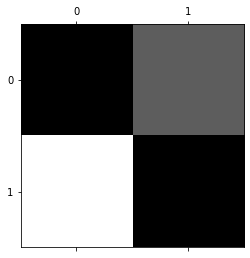

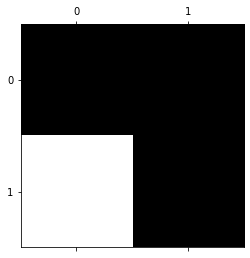

In [6]:
import matplotlib.pyplot as plt

SGD_CM = confusion_matrix(y_test_5, pred)
DUM_CM = confusion_matrix(y_test_5, predDummy)

row_sums = SGD_CM.sum(axis=1, keepdims=True)
norm_SGD_CM = SGD_CM / row_sums

np.fill_diagonal(norm_SGD_CM, 0)

plt.matshow(norm_SGD_CM, cmap=plt.cm.gray)
plt.show()

row_sums = DUM_CM.sum(axis=1, keepdims=True)
norm_DUM_CM = DUM_CM / row_sums

np.fill_diagonal(norm_DUM_CM, 0)

plt.matshow(norm_DUM_CM, cmap=plt.cm.gray)
plt.show()

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
# The main focus of this final part, is to better understand and measure the performance of our machine learning model. In this overall topic, we've examined precision, sensitivity, accuracy.
# In our implemenation of the accuracy function, we account for the case of our denominatior potentially being zero, by returning 0. 
# For all the exercises, we've utilized the MNIST-database, commonly used for training machine learning models. This database helps in understanding the confusion matrix, since it's clear how a number might be interpreted as a false positive, 
# true positive, etc...
# Among those, we've also looked into and implemented a function to create a heat-map for a confusion matrix, that allows the visualization of the performance of our algortihm. 
# To summarize, the overall outcome and goal of this exercise has been to understand and see how our algorithms predictions corresponds according to the true values.
# As is the case with other exercises, we've done these with a mix of implementing our own functions, to understand the concepts in which they implement, and using scikit-learn to compare with our own implementations of this logic and at the same time to better familiarize ourselves with the package. 
